# Paquetes

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

# Importar Data

In [128]:
df_diabetes = pd.read_csv("./datasets/diabetes2.csv")

In [129]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explorar data

In [130]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
df_describe = df_diabetes.describe().T
df_describe["CV"] = df_describe["std"]/df_describe["mean"]
df_describe

,count,mean,std,min,25%,50%,75%,max,CV
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,0.876341
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,0.264467
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,0.280091
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.776775
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,1.444170
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,0.246437
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,0.702151
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,0.353788
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,1.366786


# Visualizaciones

In [132]:
def hist_boxplot(label = str, df = pd.DataFrame(), fig_size = (5,5), bins_ = 80):
    
    fig, axs = plt.subplots(2, 1, figsize = fig_size)
    
    # Histograma
    axs[0].hist(df[label], bins = bins_)  
    axs[0].set_ylabel("Frecuancy")
    axs[0].axvline(df[label].mean(), 
                   color = "magenta", 
                   linestyle = "dashed", 
                   linewidth = 1.5)
    
    axs[0].axvline(df[label].median(), 
                   color = "cyan", 
                   linestyle = "dashed",
                   linewidth = 1.5)
    
    # Boxplot
    axs[1].boxplot(df[label], vert = False)
    axs[1].set_xlabel(label)

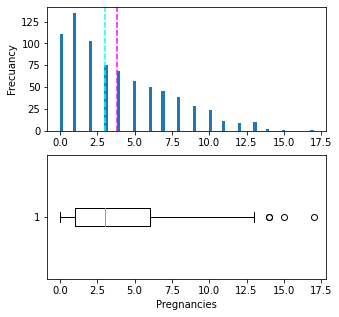

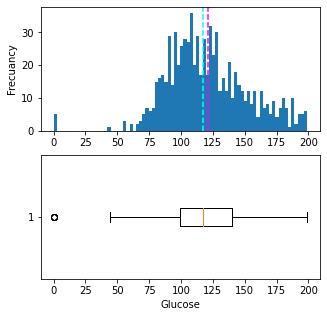

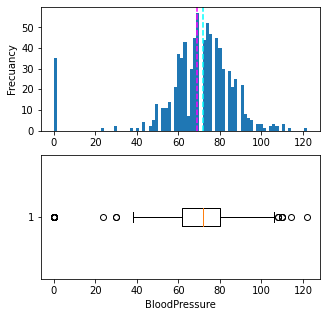

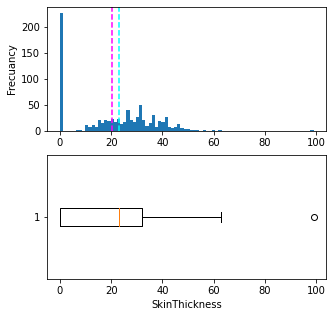

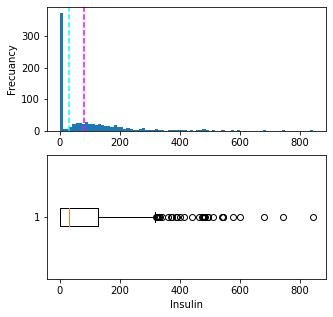

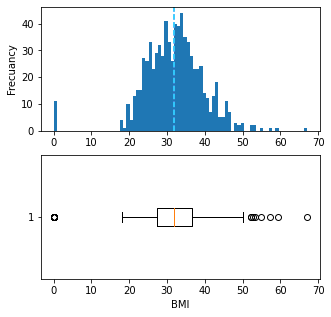

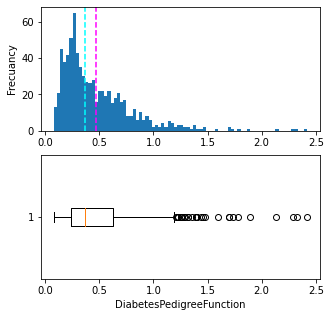

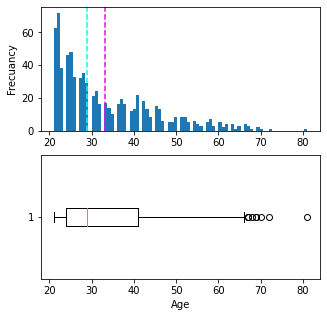

In [133]:
for column in df_diabetes.columns.tolist():
    
    if column != "Outcome":
        
        hist_boxplot(label = column, df = df_diabetes)

In [134]:
print("Datos con valores outliers")
print(f"filas: {df_diabetes.shape[0]}")
print(f"filas: {df_diabetes.shape[1]}")

Datos con valores outliers
filas: 768
filas: 9


# Eliminar datos atipicos

In [135]:
def get_iqr_values(df_in, col, std_limit = 1.5):
    
    median = df_in[col].median()
    
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    
    iqr = q3 - q1
    max_val = q3 + std_limit*iqr
    min_val = q1 - std_limit*iqr
    
    return median, q1, q3, iqr, min_val, max_val

In [136]:
def count_outliers(df_in, col = str):
    
    median, q1, q3, iqr, min_val, max_val = get_iqr_values(df_in, col, std_limit = 1.5)
    
    df_outlier = df_in.loc[(df_in[col] <= min_val) | (df_in[col] >= max_val)]
    
    return df_outlier.shape[0]

In [137]:
def remove_outliers(df_in, col):
    
    median, q1, q3, iqr, min_val, max_val = get_iqr_values(df_in, col, std_limit = 1.5)
    df_out = df_in.loc[(df_in[col] > min_val) & (df_in[col] < max_val)]
    
    return df_out

In [138]:
def remove_all_outliers(df_in, col):
    
    loop_count = 0
    outlier_count = count_outliers(df_in, col)
    
    while outlier_count > 0:
        
        loop_count += 1
        
        if (loop_count > 200):
            break
            
        df_in = remove_outliers(df_in, col)
        outlier_count = count_outliers(df_in, col)
        
    return df_in

In [139]:
for col in df_diabetes:
    
    df_diabetes =  remove_all_outliers(df_diabetes, col)

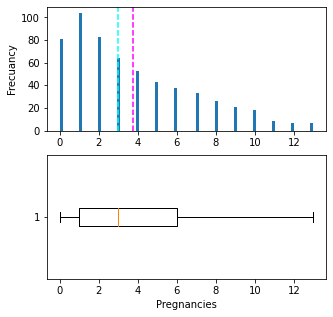

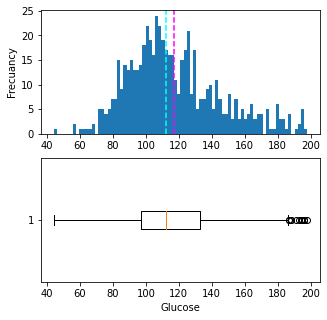

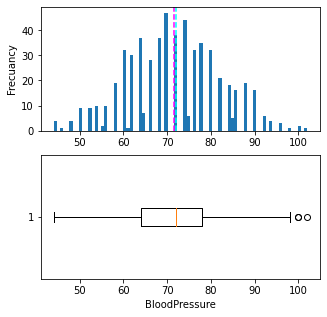

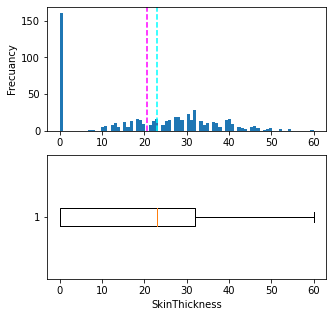

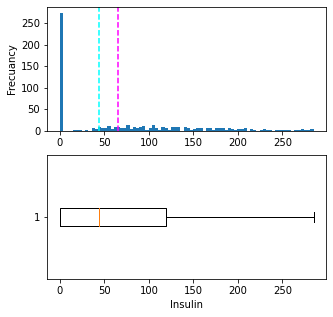

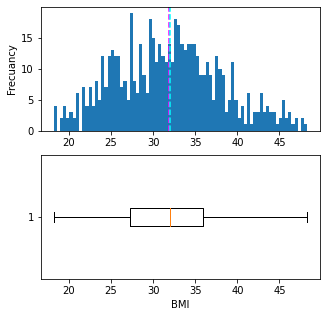

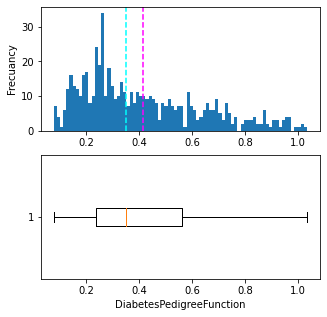

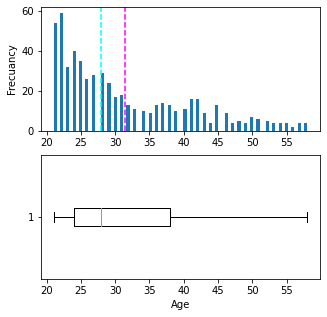

In [140]:
for column in df_diabetes.columns.tolist():
    
    if column != "Outcome":
        
        hist_boxplot(label = column, df = df_diabetes)

In [141]:
print("Datos sin valores outliers")
print(f"filas: {df_diabetes.shape[0]}")
print(f"filas: {df_diabetes.shape[1]}")

Datos sin valores outliers
filas: 586
filas: 9


In [142]:
limit_inf = (df_diabetes["Glucose"] >= (df_diabetes["Glucose"].quantile(0.25) + df_diabetes["Glucose"].std()*(-1.5)))
limit_sup = (df_diabetes["Glucose"] <= (df_diabetes["Glucose"].quantile(0.75) + df_diabetes["Glucose"].std()*(1.5)))
df_diabetes_test = df_diabetes[limit_inf & limit_sup] 

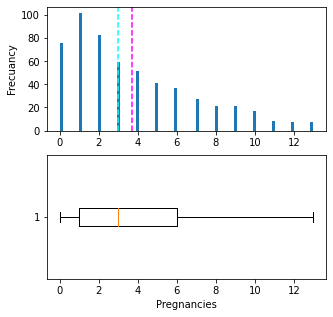

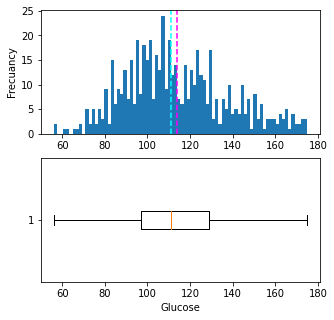

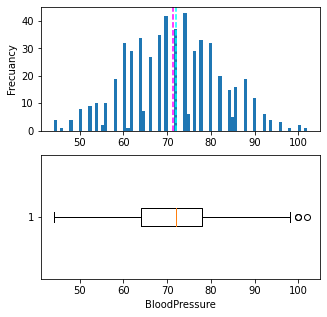

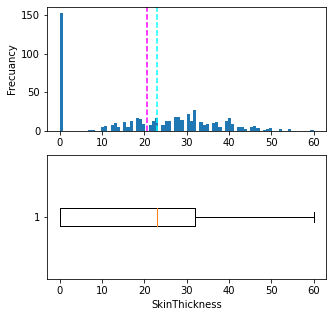

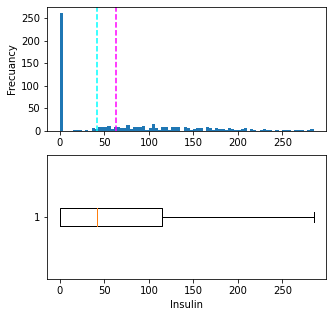

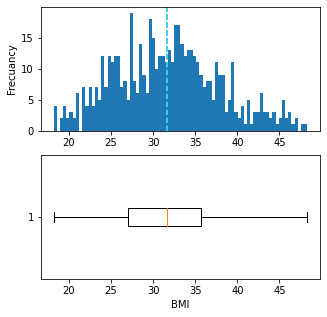

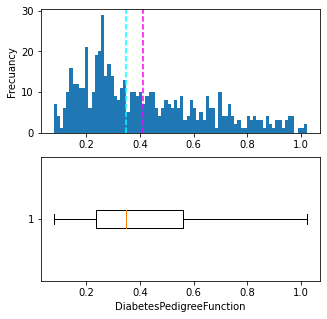

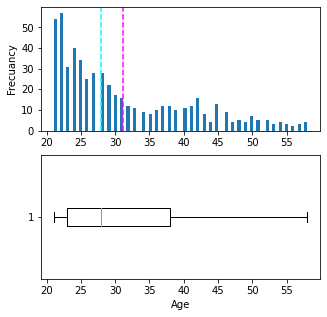

In [143]:
for column in df_diabetes_test.columns.tolist():
    
    if column != "Outcome":
        
        hist_boxplot(label = column, df = df_diabetes_test)

# Grafica de correlaciones

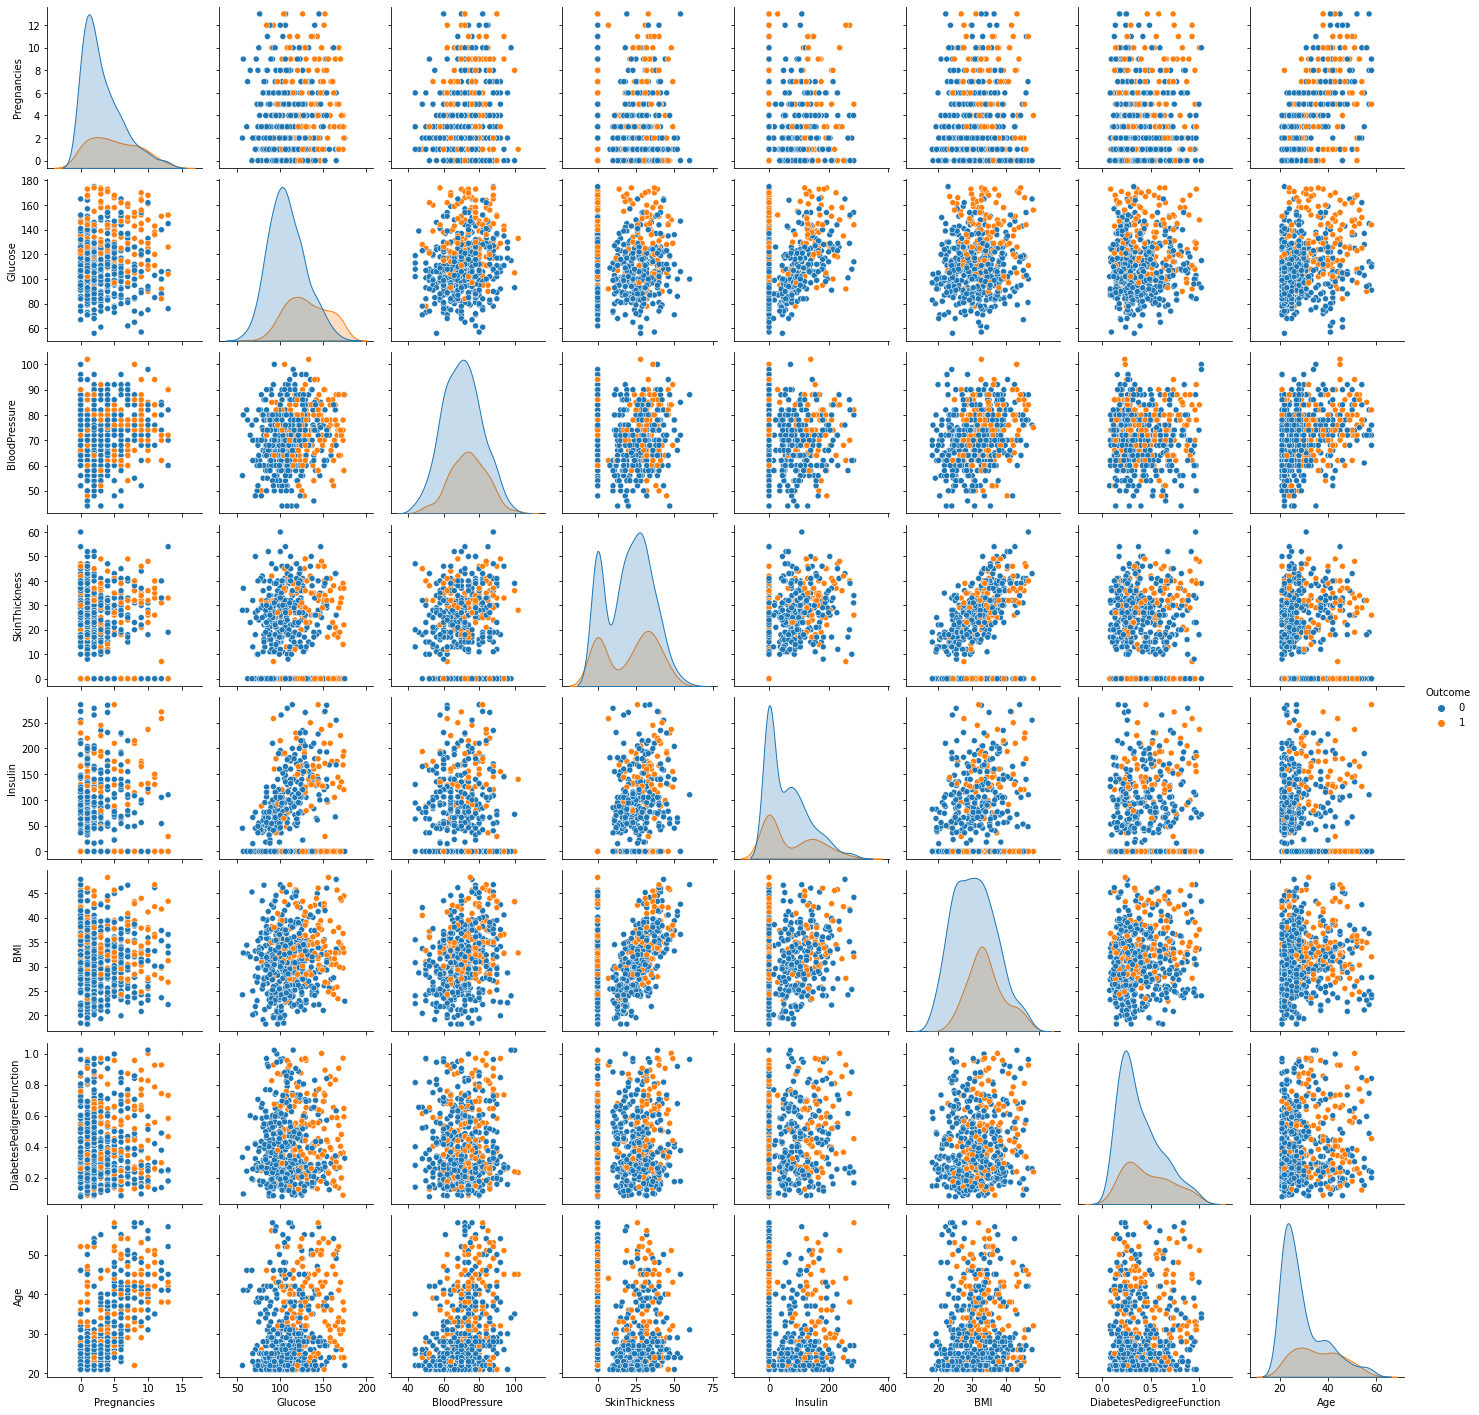

In [104]:
sns.pairplot(
    df_diabetes_test, 
    hue = "Outcome",
    #palette = "Set2"
);

<AxesSubplot:>

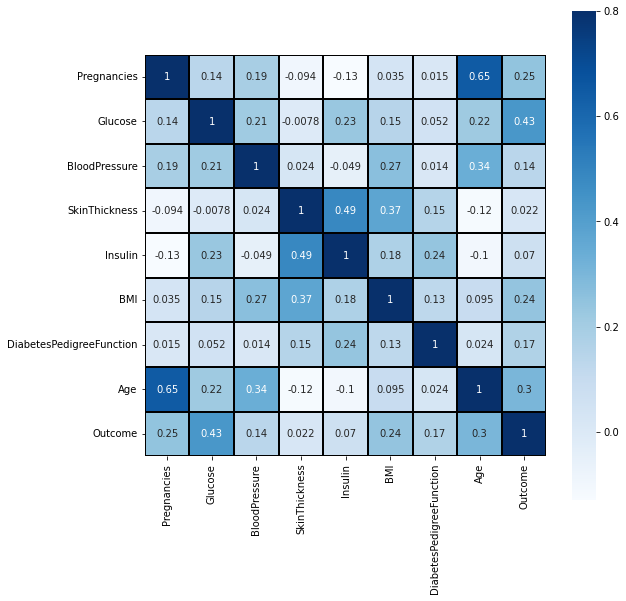

In [105]:
## Heatmap

corr = df_diabetes_test.corr()
plt.figure(figsize = (9,9))
sns.heatmap(corr, 
            vmax = 0.8, 
            linewidths = 0.05, 
            square = True, 
            linecolor = "black", 
            annot = True, 
            cmap = "Blues");

In [106]:
df_diabetes_test.reset_index(drop = True, inplace = True)

In [107]:
df_diabetes_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,5,116,74,0,0,25.6,0.201,30,0
4,3,78,50,32,88,31.0,0.248,26,1


In [108]:
df_diabetes_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,558.0,3.689964,3.222275,0.000,1.00000,3.000,6.0000,13.000
Glucose,558.0,113.991039,24.285885,56.000,97.00000,111.000,129.0000,175.000
BloodPressure,558.0,71.342294,10.829478,44.000,64.00000,72.000,78.0000,102.000
SkinThickness,558.0,20.555556,15.220095,0.000,0.00000,23.000,32.0000,60.000
Insulin,558.0,62.949821,73.852060,0.000,0.00000,41.500,114.7500,285.000
BMI,558.0,31.668996,6.299590,18.200,27.00000,31.600,35.7000,48.300
DiabetesPedigreeFunction,558.0,0.411373,0.227301,0.078,0.23725,0.349,0.5585,1.022
Age,558.0,31.173835,9.586434,21.000,23.00000,28.000,38.0000,58.000
Outcome,558.0,0.270609,0.444673,0.000,0.00000,0.000,1.0000,1.000


# Tecnicas de escalamiento y estandarizacion de datos

## Estandarizacion o Z-score

- Es el proceso de transformar los datos de tal manera que la media de cada columna sea igual a cero, y la desviación estándar de cada columna sea igual a uno. De esta manera, se obtiene la misma escala para todas las columnas
- Es una buena práctica estandarizar los datos de entrada que utiliza para la regresión logística, aunque en muchos casos no es necesario. La estandarización podría mejorar el rendimiento del algoritmo.
- El rango de los datos se ajsuta a cada variable, su rango no es fijo
- Normalmente se utiliza cuando no se desea que los datos atipicos tengan demasiada influencia
- Esta tecnica hace que la media de cada variable tienda a 0 y su desviacion estandar tienda a 1

<img src="./images/standard.PNG" height = "200" width = "200">

In [109]:
def zscore_value(item, media, std_):
    
    zscore = (item - media)/std_
    
    return zscore

In [110]:
media = df_diabetes_test["Pregnancies"].mean()
std_ = df_diabetes_test["Pregnancies"].std()
df_diabetes_test["Pregnancies_zscore"] = df_diabetes_test["Pregnancies"].apply(lambda x: zscore_value(x, media, std_))

C:\Users\usuario1\AppData\Local\Temp/ipykernel_11336/4288255685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes_test["Pregnancies_zscore"] = df_diabetes_test["Pregnancies"].apply(lambda x: zscore_value(x, media, std_))


In [111]:
df_diabetes_test[["Pregnancies", "Pregnancies_zscore"]]

,Pregnancies,Pregnancies_zscore
0,6,0.716896
1,1,-0.834803
2,1,-0.834803
3,5,0.406556
4,3,-0.214123
...,...,...
553,9,1.647915
554,2,-0.524463
555,5,0.406556
556,1,-0.834803


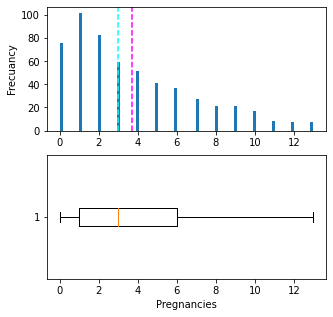

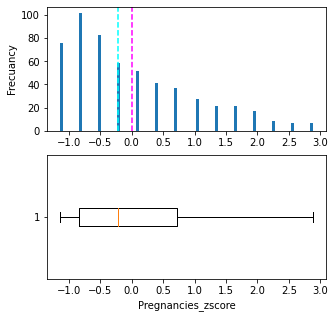

In [112]:
lables = ["Pregnancies", "Pregnancies_zscore"]

for col in lables:
    hist_boxplot(label = col, df = df_diabetes_test)

In [114]:
def standard_zscore(df):
    
    lables = df.columns.tolist()
    
    for column in labels:
        
        media = df[column].mean()
        std_ = df[column].std()
        
        df[column] = df[column].apply(lambda x: zscore_value(x, media, std_))
        
    return df

In [115]:
df_diabetes_test_standard = standard_zscore(df_diabetes_test.drop(["Outcome"], axis = 1))

C:\Users\usuario1\AppData\Local\Temp/ipykernel_11336/4190556736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: zscore_value(x, media, std_))


In [116]:
df_diabetes_test_standard.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.716896,1.400359,0.060733,0.949038,-0.852377,0.306528,0.948642,1.963834,1.640285
1,-0.834803,-1.193740,-0.493310,0.554822,-0.852377,-0.804655,-0.265607,-0.018133,-0.608558
2,-0.834803,-1.029036,-0.493310,0.160606,0.420438,-0.566544,-1.075107,-1.061274,-0.608558
3,0.406556,0.082721,0.245414,-1.350554,-0.852377,-0.963395,-0.925526,-0.122448,-0.608558
4,-0.214123,-1.481974,-1.970759,0.751930,0.339194,-0.106197,-0.718751,-0.539704,1.640285


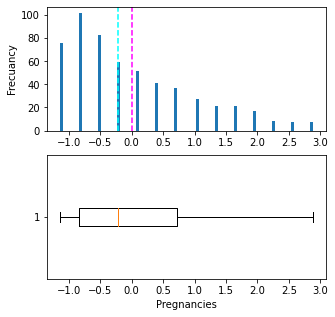

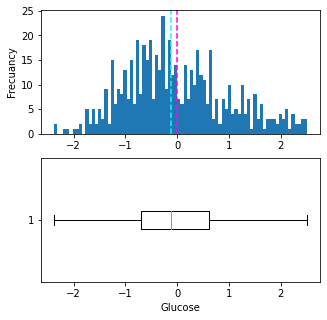

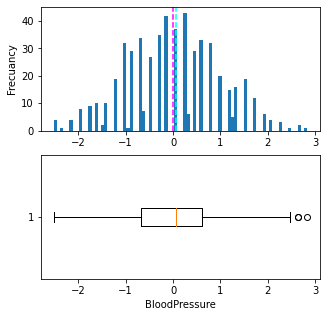

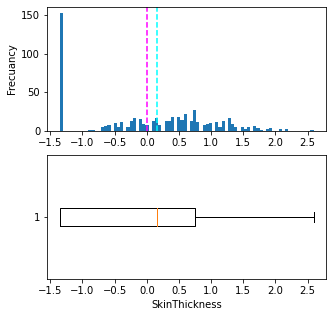

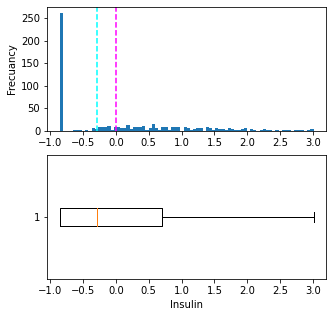

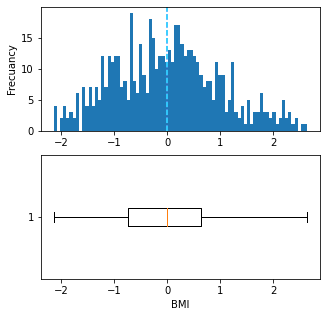

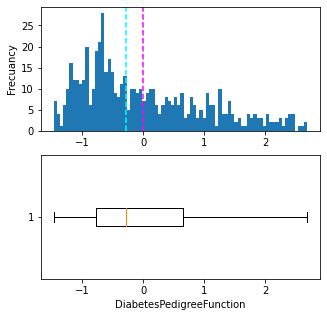

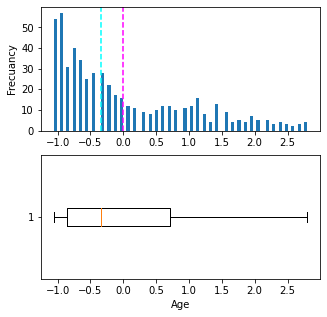

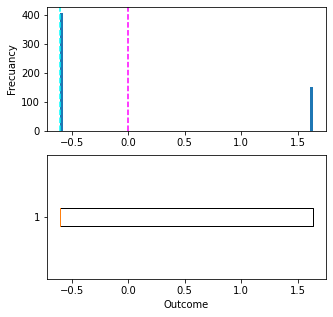

In [117]:
labels = df_diabetes_test_standard.columns.tolist()

for col in labels:
    hist_boxplot(label = col, df = df_diabetes_test_standard)

In [123]:
df_diabetes_test_standard.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,558.0,-3.501779e-17,1.0,-1.145142,-0.834803,-0.214123,0.716896,2.889274
Glucose,558.0,-1.496215e-16,1.0,-2.387850,-0.699626,-0.123160,0.618012,2.512116
BloodPressure,558.0,-5.666515e-16,1.0,-2.524803,-0.677991,0.060733,0.614776,2.830950
SkinThickness,558.0,-1.034616e-16,1.0,-1.350554,-1.350554,0.160606,0.751930,2.591603
Insulin,558.0,-9.550306e-18,1.0,-0.852377,-0.852377,-0.290443,0.701405,3.006689
BMI,558.0,3.358524e-16,1.0,-2.138075,-0.741159,-0.010953,0.639883,2.640014
DiabetesPedigreeFunction,558.0,1.082368e-16,1.0,-1.466659,-0.766045,-0.274406,0.647280,2.686427
Age,558.0,-5.730183e-17,1.0,-1.061274,-0.852646,-0.331076,0.712065,2.798347
Outcome,558.0,-1.591718e-18,1.0,-0.608558,-0.608558,-0.608558,1.640285,1.640285


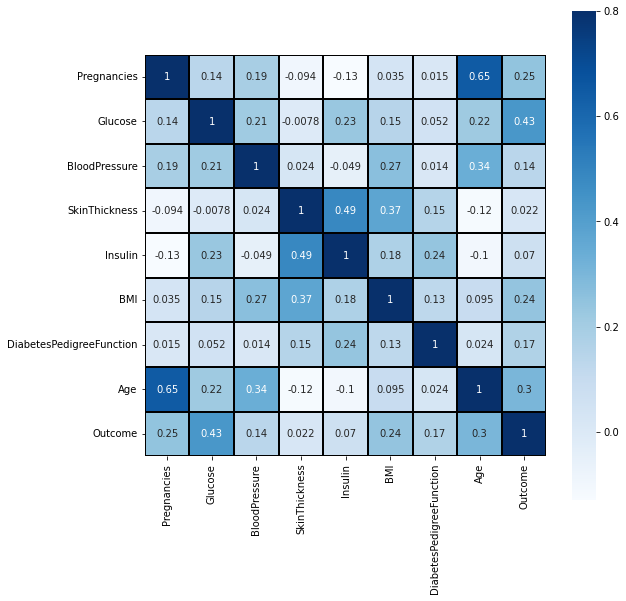

In [119]:
corr = df_diabetes_test_standard.corr()
plt.figure(figsize = (9,9))
sns.heatmap(corr, 
            vmax = 0.8, 
            linewidths = 0.05, 
            square = True, 
            linecolor = "black", 
            annot = True, 
            cmap = "Blues");

### StandardScaler con SKlearn

In [124]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_diabetes_test_sklearn = scaler.fit_transform(df_diabetes_test.drop(["Outcome"], axis = 1))

labels = df_diabetes_test.columns.tolist()
count = 0

df_diabetes_sklearn_new = pd.DataFrame(df_diabetes_test_sklearn)

for col in labels:
    
    df_diabetes_sklearn_new.rename(columns = {count: col}, inplace = True)
    count += 1

In [160]:
display(df_diabetes_test.drop(["Outcome"], axis = 1).head())
display(df_diabetes_sklearn_new.head())
display(df_diabetes_test_standard.drop(["Outcome"], axis = 1).head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.717539,1.401616,0.060787,0.949889,-0.853142,0.306803,0.949494,1.965596
1,-0.835552,-1.194811,-0.493753,0.555320,-0.853142,-0.805377,-0.265846,-0.018150
2,-0.835552,-1.029959,-0.493753,0.160750,0.420815,-0.567053,-1.076072,-1.062226
3,0.406921,0.082796,0.245634,-1.351765,-0.853142,-0.964260,-0.926356,-0.122557
4,-0.214315,-1.483303,-1.972528,0.752605,0.339498,-0.106292,-0.719396,-0.540188


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.716896,1.400359,0.060733,0.949038,-0.852377,0.306528,0.948642,1.963834
1,-0.834803,-1.193740,-0.493310,0.554822,-0.852377,-0.804655,-0.265607,-0.018133
2,-0.834803,-1.029036,-0.493310,0.160606,0.420438,-0.566544,-1.075107,-1.061274
3,0.406556,0.082721,0.245414,-1.350554,-0.852377,-0.963395,-0.925526,-0.122448
4,-0.214123,-1.481974,-1.970759,0.751930,0.339194,-0.106197,-0.718751,-0.539704


## Escalamiento

- Usa un rango que se calcula como la diferencia entre el maximo y el minimo, esta formula implemeta para cada valor la resta del minimo y a ese valor se divide por el rango
- Esta aplicacion es util ya que conserva la fora de la distribucion original
- Conserva los datos atipicos, es decir que no se ven influenciados por el escalamiento
- Deja cada variable entre un rango de 0 y 1

<img src="./images/normal.PNG" height = "200" width = "200">

In [158]:
def scaler_minmax(item, min_, max_):
    
    scale = (item - min_)/(max_ - min_)
    
    return scale

In [171]:
def scale_min_max_value(df, labels):
    
    for column in labels:
        
        min_ = df[column].min()
        max_ = df[column].max()
        
        df[column] = df[column].apply(lambda x: scaler_minmax(x, min_, max_))
        
    return df

In [164]:
df_diabetes_test_copy = df_diabetes_test.copy()

In [166]:
df_diabetes_test_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [172]:
lables = df_diabetes_test_copy.drop(["Outcome"], axis = 1)
df_diabetes_test_copy = scale_min_max_value(df_diabetes_test_copy.drop(["Outcome"], axis = 1), lables)

In [174]:
df_diabetes_test_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.773109,0.482759,0.583333,0.000000,0.511628,0.581568,0.783784
1,0.076923,0.243697,0.379310,0.483333,0.000000,0.279070,0.289195,0.270270
3,0.076923,0.277311,0.379310,0.383333,0.329825,0.328904,0.094280,0.000000
5,0.384615,0.504202,0.517241,0.000000,0.000000,0.245847,0.130297,0.243243
6,0.230769,0.184874,0.103448,0.533333,0.308772,0.425249,0.180085,0.135135
...,...,...,...,...,...,...,...,...
762,0.692308,0.277311,0.310345,0.000000,0.000000,0.142857,0.067797,0.324324
764,0.153846,0.554622,0.448276,0.450000,0.000000,0.617940,0.277542,0.162162
765,0.384615,0.546218,0.482759,0.383333,0.392982,0.265781,0.176907,0.243243
766,0.076923,0.588235,0.275862,0.000000,0.000000,0.395349,0.287076,0.702703


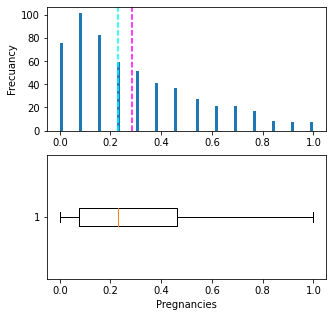

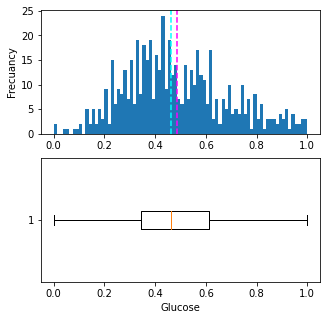

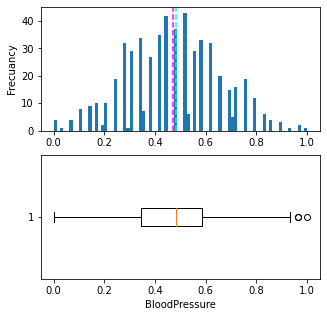

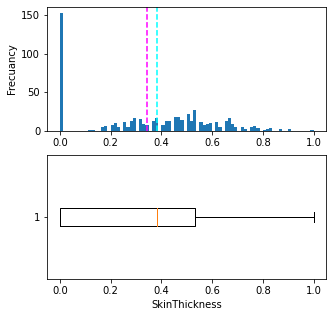

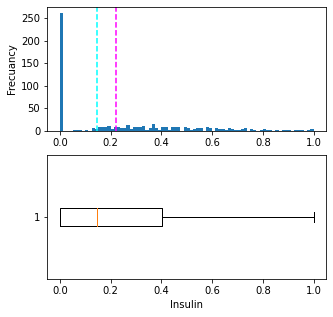

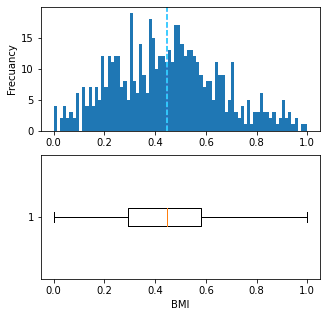

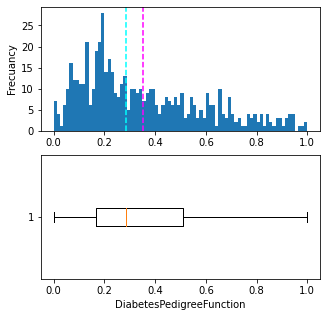

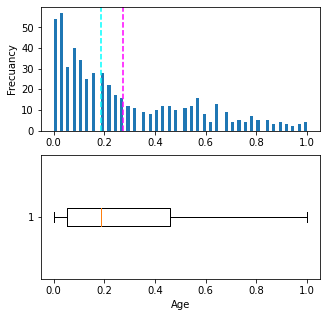

In [175]:
labels = df_diabetes_test_copy.columns.tolist()

for col in labels:
    hist_boxplot(label = col, df = df_diabetes_test_copy)

### MinMaxScaler con skalearn

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
minmax = MinMaxScaler()
df_diabetes_test_minmax = minmax.fit_transform(df_diabetes_test.drop(["Outcome"], axis = 1))

In [181]:
df_diabetes_test_minmax

array([[0.46153846, 0.77310924, 0.48275862, ..., 0.51162791, 0.5815678 ,
        0.78378378],
       [0.07692308, 0.24369748, 0.37931034, ..., 0.27906977, 0.28919492,
        0.27027027],
       [0.07692308, 0.27731092, 0.37931034, ..., 0.32890365, 0.09427966,
        0.        ],
       ...,
       [0.38461538, 0.54621849, 0.48275862, ..., 0.26578073, 0.17690678,
        0.24324324],
       [0.07692308, 0.58823529, 0.27586207, ..., 0.39534884, 0.28707627,
        0.7027027 ],
       [0.07692308, 0.31092437, 0.44827586, ..., 0.40531561, 0.25105932,
        0.05405405]])

In [183]:
labels = df_diabetes_test.columns.tolist()
count = 0

df_diabetes_minmax_new = pd.DataFrame(df_diabetes_test_minmax)

for col in labels:
    
    df_diabetes_minmax_new.rename(columns = {count: col}, inplace = True)
    count += 1

In [185]:
display(df_diabetes_test.drop(["Outcome"], axis = 1).head())
display(df_diabetes_minmax_new.head())
display(df_diabetes_test_copy.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.773109,0.482759,0.583333,0.000000,0.511628,0.581568,0.783784
1,0.076923,0.243697,0.379310,0.483333,0.000000,0.279070,0.289195,0.270270
2,0.076923,0.277311,0.379310,0.383333,0.329825,0.328904,0.094280,0.000000
3,0.384615,0.504202,0.517241,0.000000,0.000000,0.245847,0.130297,0.243243
4,0.230769,0.184874,0.103448,0.533333,0.308772,0.425249,0.180085,0.135135


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.773109,0.482759,0.583333,0.000000,0.511628,0.581568,0.783784
1,0.076923,0.243697,0.379310,0.483333,0.000000,0.279070,0.289195,0.270270
3,0.076923,0.277311,0.379310,0.383333,0.329825,0.328904,0.094280,0.000000
5,0.384615,0.504202,0.517241,0.000000,0.000000,0.245847,0.130297,0.243243
6,0.230769,0.184874,0.103448,0.533333,0.308772,0.425249,0.180085,0.135135


## Normalizacion con norma del vector

- Esta tecnica no se aplica sobre la columna especifica, sino sobre la fila, esta fila es un vector que contiene la informacion de todas las variables
- Esta tecnica implica dividir cada dato de la fila sobre la norma del vector correspondiente
- Su uso no es comun, pero, escalar las entradas a las normas de la unidad es una operación común para la clasificación de texto o la agrupación en clústeres, por ejemplo. Por ejemplo, el producto de punto de dos vectores TF-IDF normalizados l2 es la similitud del coseno de los vectores y es la métrica de similitud base para el Modelo de Espacio Vectorial comúnmente utilizado por la comunidad de Recuperación de Información.

<img src="./images/normalizer.PNG" height = "250" width = "250">

In [186]:
from sklearn.preprocessing import Normalizer

In [187]:
normalize = Normalizer()
df_diabetes_test_normalizer = normalize.fit_transform(df_diabetes_test.drop(["Outcome"], axis = 1))

In [188]:
labels = df_diabetes_test.columns.tolist()
count = 0

df_diabetes_test_normalizer_new = pd.DataFrame(df_diabetes_test_normalizer)

for col in labels:
    
    df_diabetes_minmax_new.rename(columns = {count: col}, inplace = True)
    count += 1

In [189]:
display(df_diabetes_test.drop(["Outcome"], axis = 1).head())
display(df_diabetes_test_normalizer_new.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26


,0,1,2,3,4,5,6,7
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
3,0.034911,0.809934,0.516682,0.000000,0.000000,0.178744,0.001403,0.209466
4,0.021765,0.565900,0.362757,0.232164,0.638452,0.224909,0.001799,0.188633


# Modelacion

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [191]:
df_diabetes = pd.read_csv("./datasets/diabetes2.csv")

In [227]:
def hipertuning_model(params, model, X_train, y_train, scoring_ = "accuracy", cv = 10):
    
    gridsearch = GridSearchCV(
        estimator = model,
        param_grid = params,
        scoring = scoring_,
        cv = cv                         
    )
    
    gridsearch.fit(X_train, y_train)
    
    return gridsearch.best_estimator_, gridsearch.best_score_

## Logistic Regression

### Datos sin procesar

In [201]:
def LR_model(df, out_var = str, trainsize = 0.8, randomstate = 42):
    
    LR = LogisticRegression(random_state = randomstate)
    
    X = df.drop([out_var], axis = 1).values
    y = df[[out_var]].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        train_size = trainsize, 
                                                        random_state = randomstate)
    
    model_LR = LR.fit(X_train, y_train)
    
    return model_LR, X_train, X_test, y_train, y_test

In [206]:
result_model = LR_model(df_diabetes, out_var = "Outcome", trainsize = 0.8, randomstate = 42)
y_pred = result_model[0].predict(result_model[2])
accuracy_score(result_model[4], y_pred)

0.7467532467532467

### Datos sin outliers

In [209]:
df_diabetes_sin_outliers = df_diabetes.copy()
for col in df_diabetes:
    
    df_diabetes_sin_outliers =  remove_all_outliers(df_diabetes_sin_outliers, col)

In [211]:
df_diabetes_sin_outliers.reset_index(drop = True, inplace = True)

In [212]:
result_model = LR_model(df_diabetes_sin_outliers, out_var = "Outcome", trainsize = 0.8, randomstate = 42)
y_pred = result_model[0].predict(result_model[2])
accuracy_score(result_model[4], y_pred)

0.7711864406779662

### Datos con Standard scaler

In [213]:
scaler = StandardScaler()
df_diabetes_scaler = scaler.fit_transform(df_diabetes_sin_outliers.drop(["Outcome"], axis = 1))

labels = df_diabetes_sin_outliers.columns.tolist()
count = 0

df_diabetes_scaler_new = pd.DataFrame(df_diabetes_scaler)

for col in labels:
    
    df_diabetes_scaler_new.rename(columns = {count: col}, inplace = True)
    count += 1

In [216]:
df_diabetes_scaler_new["Outcome"] = df_diabetes_sin_outliers["Outcome"]
df_diabetes_scaler_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.703874,1.085822,0.047921,0.951508,-0.855025,0.278689,0.938469,1.931187,1
1,-0.849101,-1.136507,-0.508150,0.556012,-0.855025,-0.831519,-0.277069,-0.042364,0
2,1.325064,2.320449,-0.693507,-1.355553,-0.855025,-1.354903,1.136654,0.061507,1
3,-0.849101,-0.995407,-0.508150,0.160516,0.380532,-0.593618,-1.087427,-1.081075,0
4,0.393279,-0.042980,0.233278,-1.355553,-0.855025,-0.990120,-0.937687,-0.146235,0


In [218]:
result_model = LR_model(df_diabetes_scaler_new, out_var = "Outcome", trainsize = 0.8, randomstate = 42)
y_pred = result_model[0].predict(result_model[2])
accuracy_score(result_model[4], y_pred)

0.7711864406779662

### Datos con MinMaxScaler

In [219]:
minmax = MinMaxScaler()
df_diabetes_minmax = minmax.fit_transform(df_diabetes_sin_outliers.drop(["Outcome"], axis = 1))

labels = df_diabetes_sin_outliers.columns.tolist()
count = 0

df_diabetes_minmax_new = pd.DataFrame(df_diabetes_minmax)

for col in labels:
    
    df_diabetes_minmax_new.rename(columns = {count: col}, inplace = True)
    count += 1

In [221]:
df_diabetes_minmax_new["Outcome"] = df_diabetes_sin_outliers["Outcome"]
df_diabetes_minmax_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.482759,0.583333,0.000000,0.511628,0.574268,0.783784,1
1,0.076923,0.266234,0.379310,0.483333,0.000000,0.279070,0.285565,0.270270,0
2,0.615385,0.902597,0.344828,0.000000,0.000000,0.169435,0.621339,0.297297,1
3,0.076923,0.292208,0.379310,0.383333,0.329825,0.328904,0.093096,0.000000,0
4,0.384615,0.467532,0.517241,0.000000,0.000000,0.245847,0.128661,0.243243,0


In [222]:
result_model = LR_model(df_diabetes_minmax_new, out_var = "Outcome", trainsize = 0.8, randomstate = 42)
y_pred = result_model[0].predict(result_model[2])
accuracy_score(result_model[4], y_pred)

0.7542372881355932

## hiperparemeter tunning con datos sin procesar

In [228]:
params = {
    "class_weight": [None, "balanced"],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [300, 500, 1000, 1200],
    "C": [0.01, 0.05, 0.1, 0.5, 1],
    "penalty": [None, "l1", "l2", "elasticnet"],
}

LR = LogisticRegression(random_state = 42)

X = df_diabetes.drop(["Outcome"], axis = 1).values
y = df_diabetes[["Outcome"]].values
    
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 42)

best_model, best_score = hipertuning_model(params, LR, X_train, y_train, scoring_ = "accuracy", cv = 10)

In [229]:
best_score

0.7703331570597567

## hiperparemeter tunning con datos sin outliers

In [232]:
params = {
    "class_weight": [None, "balanced"],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [300, 500, 1000, 1200],
    "C": [0.01, 0.05, 0.1, 0.5, 1],
    "penalty": [None, "l1", "l2", "elasticnet"],
}

LR = LogisticRegression(random_state = 42)

X = df_diabetes_sin_outliers.drop(["Outcome"], axis = 1).values
y = df_diabetes_sin_outliers[["Outcome"]].values
    
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 42)

best_model, best_score = hipertuning_model(params, LR, X_train, y_train, scoring_ = "accuracy", cv = 10)

In [233]:
best_score

0.7969935245143386

## hiperparemeter tunning con StandarScaler

In [235]:
params = {
    "class_weight": [None, "balanced"],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [300, 500, 1000, 1200],
    "C": [0.01, 0.05, 0.1, 0.5, 1],
    "penalty": [None, "l1", "l2", "elasticnet"],
}

LR = LogisticRegression(random_state = 42)

X = df_diabetes_scaler_new.drop(["Outcome"], axis = 1).values
y = df_diabetes_scaler_new[["Outcome"]].values
    
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 42)

best_model, best_score = hipertuning_model(params, LR, X_train, y_train, scoring_ = "accuracy", cv = 10)

In [236]:
best_score

0.7970860314523589

## hiperparemeter tunning con MinMaxScaler

In [243]:
params = {
    "class_weight": [None, "balanced"],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [300, 500, 1000, 1200],
    "C": [0.01, 0.05, 0.1, 0.5, 1],
    "penalty": [None, "l1", "l2", "elasticnet"],
}

LR = LogisticRegression(random_state = 42)

X = df_diabetes_minmax_new.drop(["Outcome"], axis = 1).values
y = df_diabetes_minmax_new[["Outcome"]].values
    
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.8, 
                                                    random_state = 42)

best_model, best_score = hipertuning_model(params, LR, X_train, y_train, scoring_ = "accuracy", cv = 15)

In [244]:
best_score

0.7969758064516128